In [ ]:
import pandas as pd
tweet_data_copy = pd.read_csv("/content/us_election_tweets copy.csv")
tweet_data_copy.head()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tweet_data_copy['qanon_aff'].fillna("not_aff", inplace=True)
tweet_data_copy.qanon_aff[27656]

'not_aff'

In [ ]:
tweets = tweet_data_copy['tweet']

In [ ]:
def lower_tweet(tw):
  lowercase_tweet = tw.lower()
  return lowercase_tweet

In [ ]:
tweet_data_copy['lowercase_tweets'] = tweet_data_copy['tweet'].str.lower()
tweet_data_copy['lowercase_tweets']

0         hi if you want americans to infuriate you in t...
1         @armstrongcbc no surprise. it's going to be a ...
2         i can’t wait till after the us election so i c...
3         america as a foreign country, by foreign corre...
4         wow. i guess if you want actual journalism and...
                                ...                        
128148    @maximebernier this setting the table for the ...
128149    donald trump seeks fast-track approval of oxfo...
128150    this is what we need daily in the media, folks...
128151    he can get it inject to himself rush delivered...
128152    as expected: “trump considers fast-tracking uk...
Name: lowercase_tweets, Length: 128153, dtype: object

In [ ]:
tweet_data_copy['lowercase_tweets'] = tweet_data_copy.lowercase_tweets.astype(str)

In [ ]:
def clean_data(tw):
  punctuations = '''!()-[]{};:'"\,<>./?@#+=$%^&*_~'''

  tw.replace("’", "")

  tw.replace('“', '')

  no_punct = ""
  for char in tw:
   if char not in punctuations:
       no_punct = no_punct + char

  return no_punct

In [ ]:
tweet_data_copy["nopunct_lower_tweets"] = tweet_data_copy['lowercase_tweets'].apply(clean_data)

tweet_data_copy["nopunct_lower_tweets"]

0         hi if you want americans to infuriate you in t...
1         armstrongcbc no surprise its going to be a vol...
2         i can’t wait till after the us election so i c...
3         america as a foreign country by foreign corres...
4         wow i guess if you want actual journalism and ...
                                ...                        
128148    maximebernier this setting the table for the u...
128149    donald trump seeks fasttrack approval of oxfor...
128150    this is what we need daily in the media folks ...
128151    he can get it inject to himself rush delivered...
128152    as expected “trump considers fasttracking uk c...
Name: nopunct_lower_tweets, Length: 128153, dtype: object

In [ ]:
tweet_data_copy['nopunct_lower_tweets'] = tweet_data_copy.nopunct_lower_tweets.astype(str)

In [ ]:
#Converts to string 
def remove_stop_words(tw):
  with open("/content/stop_words.txt", "r") as my_stopwords:
    stopwords_list = my_stopwords.read()
    tw_list = tw.split(' ')
    new_list = []
    new_string = ""
    for i in tw_list: 
      if i not in stopwords_list:
        new_list.append(i)
      else:
        pass 
      my_stopwords.close
  for j in new_list: 
        new_string = new_string + " " + j 
  return new_string 

In [ ]:
tweet_data_copy['clean_text'] = tweet_data_copy["nopunct_lower_tweets"].apply(remove_stop_words)
tweet_data_copy['clean_text']=tweet_data_copy.clean_text.astype(str)

In [ ]:
def bag_of_words(tw):
  twlist=tw.split(' ')
  twset=set(twlist)
  bag=[]

  for i in twset:
    count=twlist.count(i)
    bag.append({i : count})

  return bag

In [ ]:
tweet_data_copy['bag_of_words'] = tweet_data_copy["clean_text"].apply(bag_of_words)

In [ ]:
def candidate_relation(tw):
  biden=['joe', 'biden']
  
  if (('trump' in tw) or ('trumps' in tw)or ('donald' in tw)or ('donalds' in tw)or ('maga' in tw)) and (('joe' in tw) or ('biden' in tw)or ('joes' in tw) or ('bidens' in tw)):
    x= 'BT'
  elif ('trump' in tw) or ('trumps' in tw)or ('donald' in tw)or ('donalds' in tw)or ('maga' in tw):
    x= 'T'
  elif ('joe' in tw) or ('biden' in tw) or ('joes' in tw) or ('bidens' in tw):
    x= 'B'
  else :
    x= 'None'

  return x

In [ ]:
tweet_data_copy['candidate_relation']=tweet_data_copy['clean_text'].apply(candidate_relation)

tweet_data_copy['candidate_relation']

0         None
1         None
2            T
3         None
4         None
          ... 
128148    None
128149       T
128150    None
128151       T
128152       T
Name: candidate_relation, Length: 128153, dtype: object

In [ ]:
tweet_data_copy['candidate_relation']=tweet_data_copy.candidate_relation.astype(str)

In [ ]:
def tweet_score(tw):
  corpus_text = pd.read_csv("/content/corpus_text.csv", names=['word_name', 'value'])

  #print(corpus_text)

  tw_list=tw.split()

  word_name=list(corpus_text['word_name'])

  #print(word_name)

  corpus_text.set_index('word_name')

  total = 0
  word_number=0
  for word in tw_list:
    #print(word)
    if word in word_name:
      word_number+=1
      #total = total + corpus_text.sum(level="word_name")
      total=total + corpus_text[corpus_text['word_name']==word]['value'].item()
      #print(total)
      total=total/word_number
    else:
      pass

  if total == 0:
    total = -15
  
  score=(total+5)/10

  return score 

In [ ]:
tweet_data_copy['tweet_score']=tweet_data_copy['clean_text'].apply(tweet_score)

In [ ]:
tweet_data_copy['tweet_score']=tweet_data_copy.tweet_score.astype(float)

**How positive or negative are the qanon and non-qanon affiliated tweets?**

In [ ]:
qanon_df = tweet_data_copy[(tweet_data_copy.qanon_aff == "qanon") & (tweet_data_copy.tweet_score >= 0)]
qanon_df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,qanon_aff,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest,lowercase_tweets,nopunct_lower_tweets,clean_text,bag_of_words,candidate_relation,tweet_score
411,412,1.32E+18,1.32E+18,2020-10-28 18:12:02 IST,10/28/2020,18:12:02,530,qanon,1.265154e+09,sriv06,Steph,NaN,@realDonaldTrump I’m confused! Media in Canad...,en,['realdonaldtrump'],[],[],0.0,0.0,1.0,https://twitter.com/sriv06/status/132143203518...,NaN,NaN,0.0,"{'user_id': '25073877', 'username': 'realDonal...",NaN,NaN,NaN,NaN,@realdonaldtrump i’m confused! media in canad...,realdonaldtrump i’m confused media in canada ...,realdonaldtrump i’m confused canada europe ta...,"[{'': 1}, {'i’m': 1}, {'timewill': 1}, {'talki...",T,0.3000
1393,1394,1.32E+18,1.32E+18,2020-10-28 14:23:17 IST,10/28/2020,14:23:17,530,qanon,3.835582e+09,uncledopey,LeeHarvey BAZINGA 傻子,NaN,Sleepy US Election rigged in favour of voters ...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/uncleDopey/status/13213744...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,sleepy us election rigged in favour of voters ...,sleepy us election rigged in favour of voters ...,sleepy election rigged favour voters plandemic,"[{'': 1}, {'favour': 1}, {'sleepy': 1}, {'vote...",None,0.4000
2531,2532,1.32E+18,1.32E+18,2020-10-28 08:12:49 IST,10/28/2020,8:12:49,530,qanon,7.502958e+07,rudee_al,Alex Whiteman,NaN,#Election2020 #Elections2020 #ElectionDay #USE...,und,[],[],['https://pbs.twimg.com/media/ElYiSDDX0AQW-Z_....,1.0,0.0,0.0,https://twitter.com/rudee_al/status/1321281236...,NaN,NaN,1.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,#election2020 #elections2020 #electionday #use...,election2020 elections2020 electionday uselect...,election2020 elections2020 electionday uselec...,"[{'': 1}, {'covid1984': 1}, {'propaganda': 1},...",BT,0.3000
2817,2818,1.32E+18,1.32E+18,2020-10-28 06:41:46 IST,10/28/2020,6:41:46,530,qanon,1.170000e+18,melikewater,Bruce Lee (fan)😷👊🦋🐝,NaN,Deep State: Keep this off limits in case Joe w...,en,[],[],[],0.0,0.0,1.0,https://twitter.com/MeLikeWater/status/1321258...,NaN,https://twitter.com/nikki_miumiu/status/132124...,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,deep state: keep this off limits in case joe w...,deep state keep this off limits in case joe wi...,deep state limits case joe wins election buri...,"[{'': 1}, {'limits': 1}, {'hunterbidenslaptop'...",BT,0.6500
3055,3056,1.32E+18,1.31E+18,2020-10-28 05:31:54 IST,10/28/2020,5:31:54,530,qanon,1.310000e+18,scot_highlander,Scottish Highlander,NaN,@Rossana38510044 The result of vaccine researc...,en,['rossana38510044'],[],[],1.0,0.0,0.0,https://twitter.com/Scot_Highlander/status/132...,NaN,NaN,0.0,"{'user_id': '1265205387537584129', 'username':...",NaN,NaN,NaN,NaN,@rossana38510044 the result of vaccine researc...,rossana38510044 the result of vaccine research...,rossana38510044 vaccine wrong purposely engin...,"[{'': 1}, {'purposely': 1}, {'fnanced': 1}, {'...",None,0.5625


In [ ]:
nonqanon_df = tweet_data_copy[(tweet_data_copy.qanon_aff == "not_aff") & (tweet_data_copy.tweet_score >= 0)]
nonqanon_df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,qanon_aff,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest,lowercase_tweets,nopunct_lower_tweets,clean_text,bag_of_words,candidate_relation,tweet_score
0,1,1.32E+18,1.32E+18,2020-10-28 19:32:28 IST,10/28/2020,19:32:28,530,not_aff,6.066668e+07,mcflyroro,Róisín ❤️,NaN,Hi if you want Americans to infuriate you in t...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/mcflyroro/status/132145227...,NaN,https://twitter.com/niallofficial/status/13214...,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,hi if you want americans to infuriate you in t...,hi if you want americans to infuriate you in t...,americans infuriate comments realise doesn’t ...,"[{'': 1}, {'thread': 1}, {'infuriate': 1}, {'r...",None,0.300000
2,3,1.32E+18,1.32E+18,2020-10-28 19:32:06 IST,10/28/2020,19:32:06,530,not_aff,9.150331e+08,bogwollox,J L,NaN,I can’t wait till after the US election so I c...,en,[],[],[],0.0,0.0,0.0,https://twitter.com/Bogwollox/status/132145218...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,i can’t wait till after the us election so i c...,i can’t wait till after the us election so i c...,can’t wait election fun trump supporters remi...,"[{'': 1}, {'fun': 1}, {'day': 1}, {'wait': 1},...",T,0.483333
6,7,1.32E+18,1.32E+18,2020-10-28 19:31:58 IST,10/28/2020,19:31:58,530,not_aff,1.612686e+09,tarantulafx,M.Ec. Nenad Kerkez T,NaN,🔥 #AUDUSD Price Swings and Wave Before US Elec...,en,[],['https://buff.ly/2Hx4NZL'],[],0.0,0.0,0.0,https://twitter.com/TarantulaFX/status/1321452...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,🔥 #audusd price swings and wave before us elec...,🔥 audusd price swings and wave before us elect...,🔥 audusd price swings wave election 🔥 httpstc...,"[{'': 1}, {'daytrading': 1}, {'🔥': 2}, {'forex...",None,0.300000
7,8,1.32E+18,1.32E+18,2020-10-28 19:31:55 IST,10/28/2020,19:31:55,530,not_aff,1.110000e+18,acsus15,ACSUS,NaN,"""If Donald Trump wins the US election there wi...",en,"['bobwekesa', 'news24']",['https://www.news24.com/news24/analysis/analy...,[],0.0,0.0,0.0,https://twitter.com/ACSUS15/status/13214521362...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,"""if donald trump wins the us election there wi...",if donald trump wins the us election there wil...,donald trump wins election fewer global engag...,"[{'': 1}, {'fewer': 1}, {'global': 1}, {'https...",BT,0.900000
10,11,1.32E+18,1.32E+18,2020-10-28 19:31:40 IST,10/28/2020,19:31:40,530,not_aff,2.700010e+07,robm777,RobRaider,NaN,@NovusOrdoWatch Isn’t it ‘curious’ that Franci...,en,['novusordowatch'],[],[],0.0,0.0,0.0,https://twitter.com/RobM777/status/13214520743...,NaN,NaN,0.0,"{'user_id': '554692292', 'username': 'NovusOrd...",NaN,NaN,NaN,NaN,@novusordowatch isn’t it ‘curious’ that franci...,novusordowatch isn’t it ‘curious’ that francis...,novusordowatch isn’t ‘curious’ francis declar...,"[{'': 1}, {'‘curious’': 1}, {'death': 1}, {'‘b...",None,0.300000


In [ ]:
qanon_df.tweet_score.describe()

count    263.000000
mean       0.452995
std        0.174454
min        0.100000
25%        0.300000
50%        0.435000
75%        0.560417
max        0.900000
Name: tweet_score, dtype: float64

In [ ]:
nonqanon_df.tweet_score.describe()

count    72084.000000
mean         0.495970
std          0.188172
min          0.000000
25%          0.333333
50%          0.466667
75%          0.650000
max          1.000000
Name: tweet_score, dtype: float64

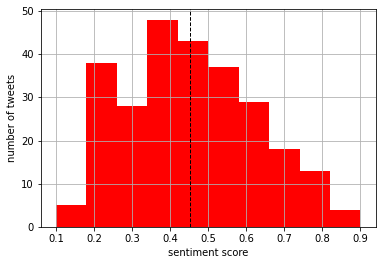

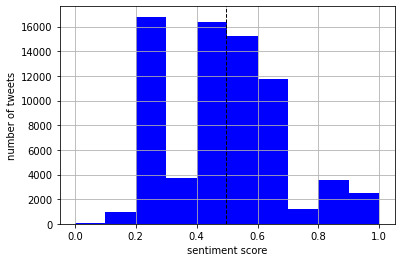

In [ ]:
plt.hist(qanon_df.tweet_score, color='red')
plt.xlabel('sentiment score')
plt.ylabel('number of tweets')
plt.grid()
plt.axvline(qanon_df.tweet_score.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

plt.hist(nonqanon_df.tweet_score, color='blue')
plt.xlabel('sentiment score')
plt.ylabel('number of tweets')
plt.grid()
plt.axvline(nonqanon_df.tweet_score.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

**Generate a QAnon Word Cloud**

In [ ]:
from PIL import Image
import re

qanon_df['bag_of_words'] = qanon_df.bag_of_words.astype(str)
qanon_df['bag_of_words'] = qanon_df['bag_of_words'].str.replace(r'[-./?!,":;()\']',' ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

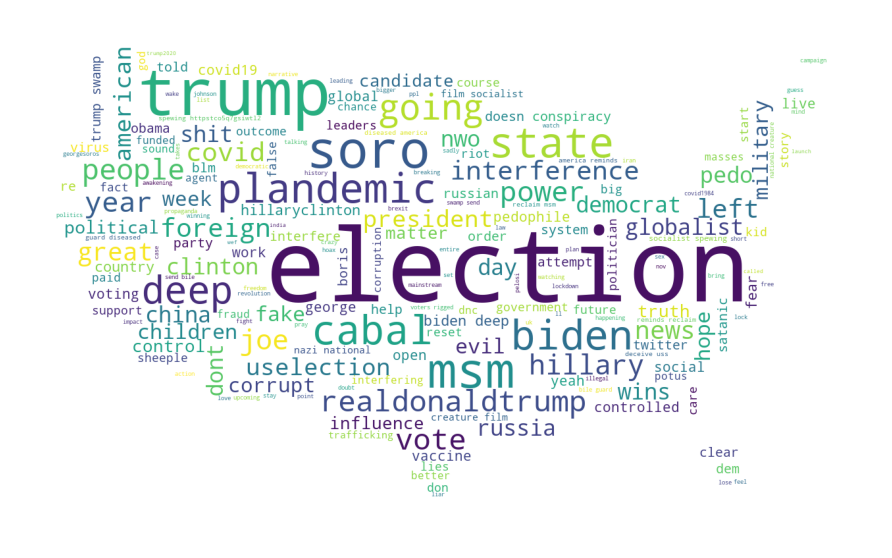

In [ ]:
text = (" ").join(qanon_df.bag_of_words)
usa_mask = np.array(Image.open("/content/Screen Shot 2020-11-15 at 1.59.47 PM.png"))

stopwords.update(["amp", "well", "msm ", "rich msm", "trump msm"])

wordcloud = WordCloud(stopwords=stopwords, mask=usa_mask, background_color="white").generate(text)

import matplotlib.pyplot as mpLib
%matplotlib inline 
mpLib.figure(figsize=(20,10))
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()